In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA
# Reading firt few row data
df = pd.read_csv('cars_detail.csv') 
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [2]:
# Understand number of rows and columns
df.shape

(4340, 8)

In [3]:
# Showing the number of records in each column, type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
# Converts the column names into a Python list
df.columns.tolist()

['name',
 'year',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner']

In [5]:
# Check for duplicate value
df.duplicated().sum()

763

In [6]:
# Handle duplicate data
df = df.drop_duplicates()
df.shape

(3577, 8)

In [7]:
# Statistical summary for each numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3577.0,2012.962538,4.251759,1992.0,2010.0,2013.0,2016.0,2020.0
selling_price,3577.0,473912.542074,509301.809816,20000.0,200000.0,350000.0,600000.0,8900000.0
km_driven,3577.0,69250.545709,47579.940016,1.0,36000.0,60000.0,90000.0,806599.0


In [8]:
# Checks for missing values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

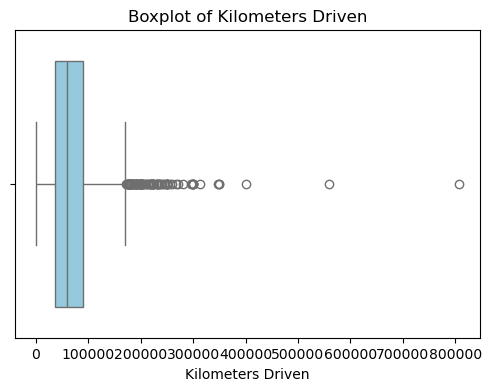

In [9]:
# Check for outliners
# Use boxplots to find extreme values in km driven
plt.figure(figsize=(6,4))
sns.boxplot(x=df['km_driven'], color='skyblue')
plt.title('Boxplot of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.show()

In [10]:
# 95% of cars cannot run more than 322000km, so remove them
df = df[(df['km_driven']<322000)].reset_index(drop=True)

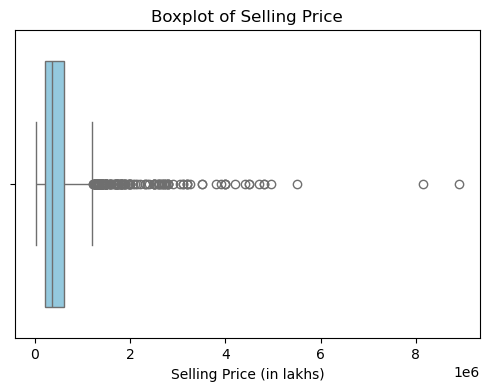

In [11]:
# Use boxplots to find extreme values in selling price
plt.figure(figsize=(6,4))
sns.boxplot(x=df['selling_price'], color='skyblue')
plt.title('Boxplot of Selling Price')
plt.xlabel('Selling Price (in lakhs)')
plt.show()

In [12]:
# Check outliner record
# Based on boxplot to decide the cutoff, and check whether it is luxury brand with high selling price if yes no need to remove
df[df['selling_price'] > 5000000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
75,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner
3251,Audi RS7 2015-2019 Sportback Performance,2016,8900000,13000,Petrol,Dealer,Automatic,First Owner
3335,Mercedes-Benz GLS 2016-2020 350d 4MATIC,2016,5500000,77350,Diesel,Dealer,Automatic,First Owner


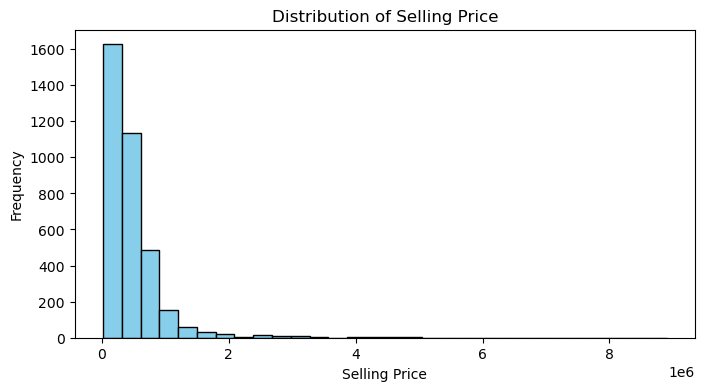

In [13]:
# Data visualization
plt.figure(figsize=(8,4))
plt.hist(df['selling_price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

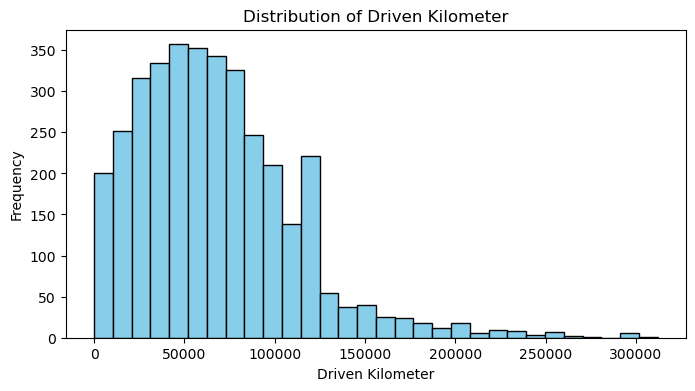

In [14]:
# Histogram for km_driven
plt.figure(figsize=(8,4))
plt.hist(df['km_driven'], bins=30, color='skyblue', edgecolor='black') # divides data (the km_driven column) into 30 “bins”, 30 ranges of kilometres
plt.title('Distribution of Driven Kilometer')
plt.xlabel('Driven Kilometer')
plt.ylabel('Frequency')
plt.show()

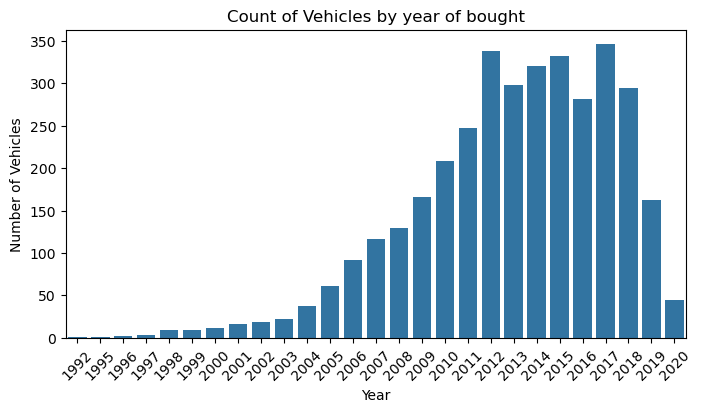

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(x='year', data=df)
plt.title('Count of Vehicles by year of bought')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)  # Rotate the labels
plt.show()

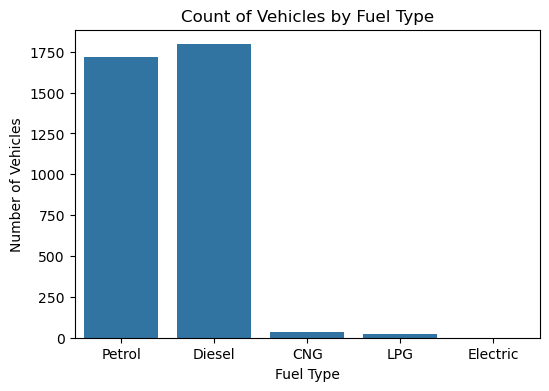

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='fuel', data=df)
plt.title('Count of Vehicles by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Vehicles')
plt.show()

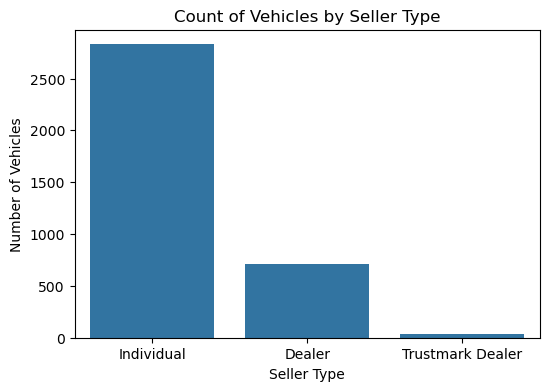

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='seller_type', data=df)
plt.title('Count of Vehicles by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Number of Vehicles')
plt.show()

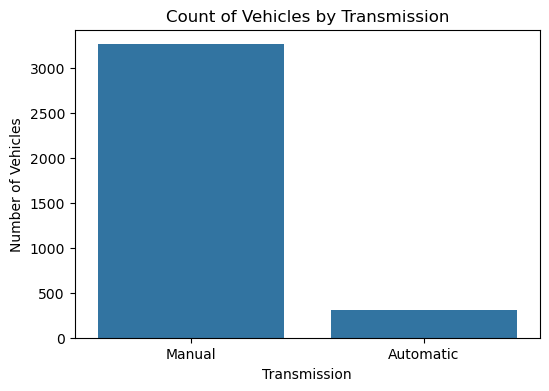

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='transmission', data=df)
plt.title('Count of Vehicles by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Number of Vehicles')
plt.show()

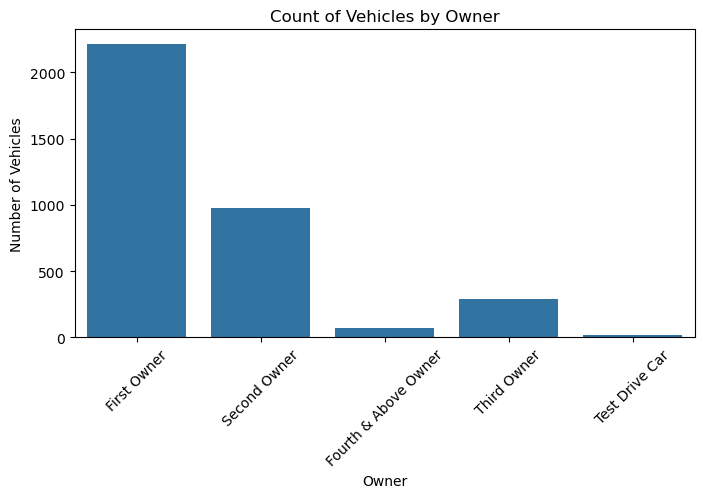

In [19]:
plt.figure(figsize=(8,4))
sns.countplot(x='owner', data=df)
plt.title('Count of Vehicles by Owner')
plt.xlabel('Owner')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

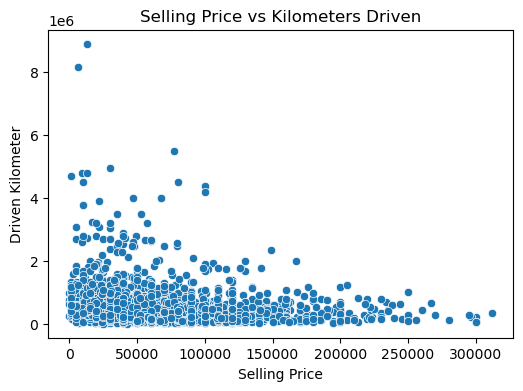

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='km_driven', y='selling_price')
plt.title('Selling Price vs Kilometers Driven')
plt.xlabel('Driven Kilometer')
plt.ylabel('Selling Price')
plt.show()

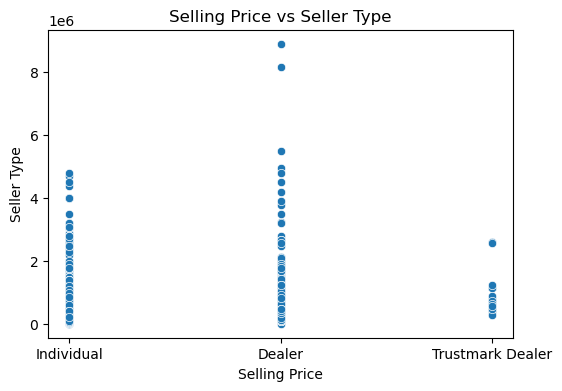

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='seller_type', y='selling_price')
plt.title('Selling Price vs Seller Type')
plt.xlabel('Selling Type')
plt.ylabel('Seller Price')
plt.show()

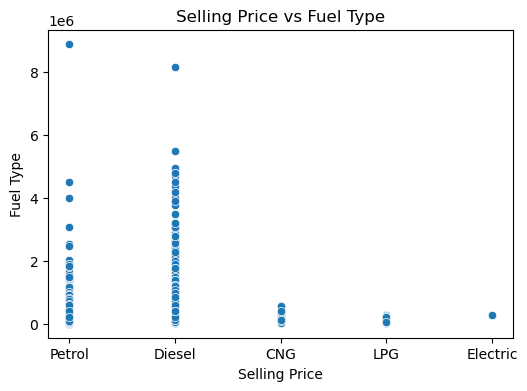

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='fuel', y='selling_price')
plt.title('Selling Price vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

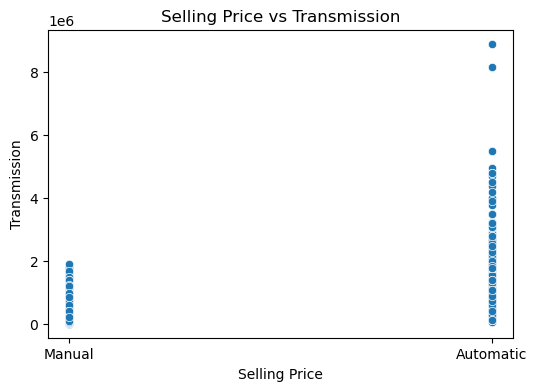

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='transmission', y='selling_price')
plt.title('Selling Price vs Transmission')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()

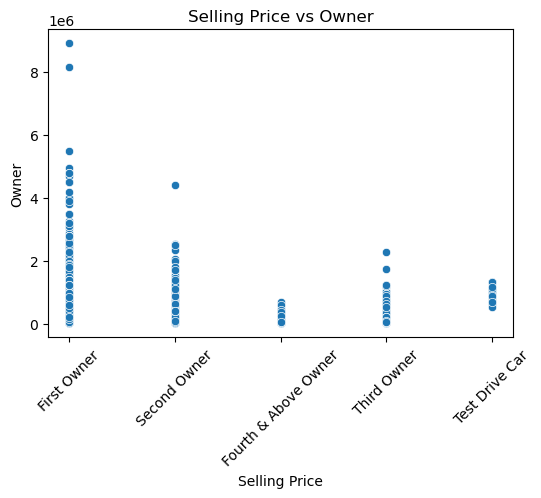

In [24]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='owner', y='selling_price')
plt.title('Selling Price vs Owner')
plt.xlabel('Owner')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

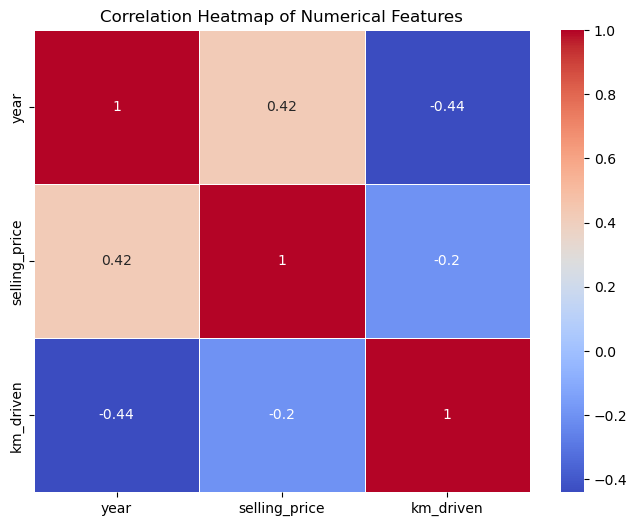

In [25]:
# Heatmap with only numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5) # Annotate = write the numbers inside each box.
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [26]:
# Convert year to car age
df['car_age'] = 2020 - df['year'] # Creates a new column
df['brand'] = df['name'].apply(lambda x: x.split()[0]) # Extract brand from name
df[['year', 'car_age', 'brand']].head()

,year,car_age,brand
0,2007,13,Maruti
1,2007,13,Maruti
2,2012,8,Hyundai
3,2017,3,Datsun
4,2014,6,Honda


In [27]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,13,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,13,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,8,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,3,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,6,Honda


In [28]:
# Drop year and name
df = df.drop('name', axis=1)
df = df.drop('year', axis=1)
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age,brand
0,60000,70000,Petrol,Individual,Manual,First Owner,13,Maruti
1,135000,50000,Petrol,Individual,Manual,First Owner,13,Maruti
2,600000,100000,Diesel,Individual,Manual,First Owner,8,Hyundai
3,250000,46000,Petrol,Individual,Manual,First Owner,3,Datsun
4,450000,141000,Diesel,Individual,Manual,Second Owner,6,Honda


In [29]:
# Convert categorical variables into numeric using One-Hot Encoding, including fuel, seller type, transmission, owner and brand
# And drop the original column for each categorical feature
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner', 'brand'], drop_first=True) 
df = df.astype(int) # Convert to 1 or 0, not true or false
df.head()

,selling_price,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,60000,70000,13,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Save cleaned data
df.to_csv('cleaned_cars_details.csv', index=False)

In [31]:
# Load cleaned data
df_cleaned = pd.read_csv('cleaned_cars_details.csv') 
df.head()

,selling_price,km_driven,car_age,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,60000,70000,13,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,135000,50000,13,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,600000,100000,8,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,250000,46000,3,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,450000,141000,6,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X = df_cleaned.drop('selling_price', axis=1) # Value want to predict
y = df_cleaned['selling_price'] # Columns that help predict the price

In [33]:
from sklearn.model_selection import train_test_split

# Split data, 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Makes it reproducible and same split every time, always 42

In [34]:
# Traditional model
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Train 100 decision trees inside this Random Forest. If no adding system also will assign default value 100. The rest parameter no set will be default
rf_model.fit(X_train, y_train)
# Testing
y_pred_rf = rf_model.predict(X_test)

In [35]:
# Deep learning model
# MLPRegressor
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor( # All defualt value
    hidden_layer_sizes=(100), # Number of neurons in each hidden layer
    activation='relu', # Activation function for hidden layers
    solver='adam', # Optimization algorithm
    alpha=0.0001, # Helps prevent overfitting
    learning_rate='constant', # How the learning rate changes during training
    max_iter=1000, # Number of iterations
    early_stopping= False, # Stop early if validation score doesn’t improve, useful for avoiding overfitting
    random_state=42
)

mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

In [36]:
# Ensemble model
# Using average method
from sklearn.ensemble import VotingRegressor

ensemble_mlp_rf = VotingRegressor([
    ('rf', rf_model),
    ('mlp', mlp_model)
])

ensemble_mlp_rf.fit(X_train, y_train)
y_pred_ensemble = ensemble_mlp_rf.predict(X_test)

In [37]:
# Evaluate all models
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, mae, rmse

rf_results = evaluate_model(y_test, y_pred_rf)
mlp_results = evaluate_model(y_test, y_pred_mlp)
ensemble_results = evaluate_model(y_test, y_pred_ensemble)

print("Random Forest  - R2: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}".format(*rf_results))
print("MLP Regression - R2: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}".format(*mlp_results))
print("Ensemble Model - R2: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}".format(*ensemble_results))

Random Forest  - R2: 0.611, MAE: 155350.025, RMSE: 309835.878
MLP Regression - R2: -0.456, MAE: 370992.681, RMSE: 598983.645
Ensemble Model - R2: 0.409, MAE: 214119.587, RMSE: 381605.757


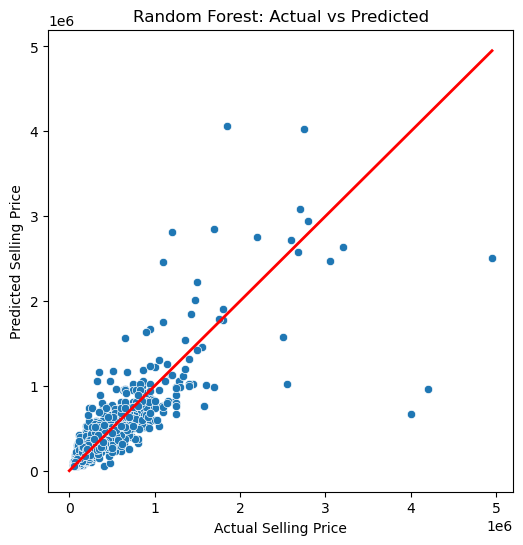

In [38]:
# Compare actual and prediction
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

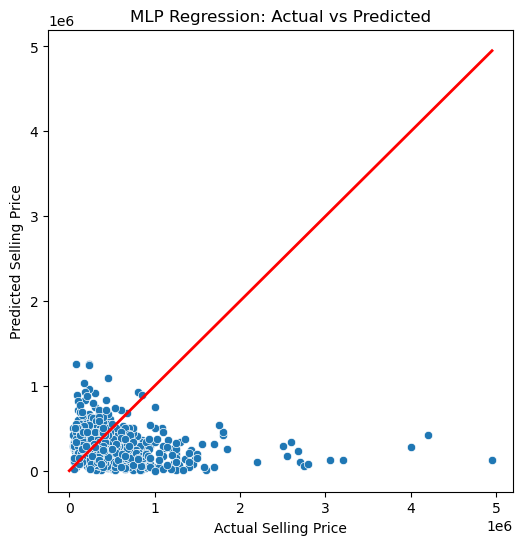

In [39]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_mlp)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('MLP Regression: Actual vs Predicted')
plt.show()

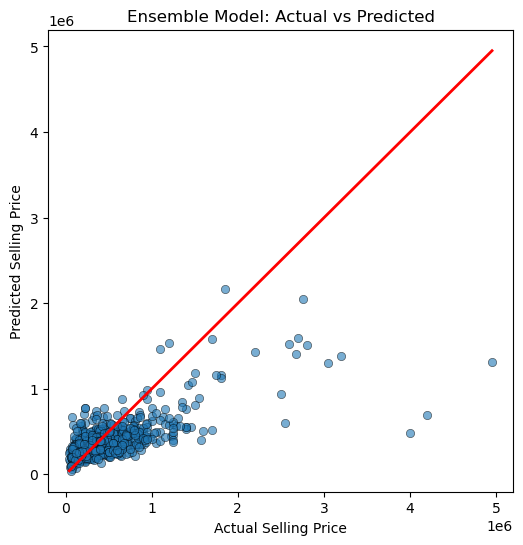

In [40]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_ensemble, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Ensemble Model: Actual vs Predicted')
plt.show()

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}
Best CV R2  : 0.6680344573460355

Random Forest (tuned) - R2: 0.725, MAE: 141231.121, RMSE: 260487.472


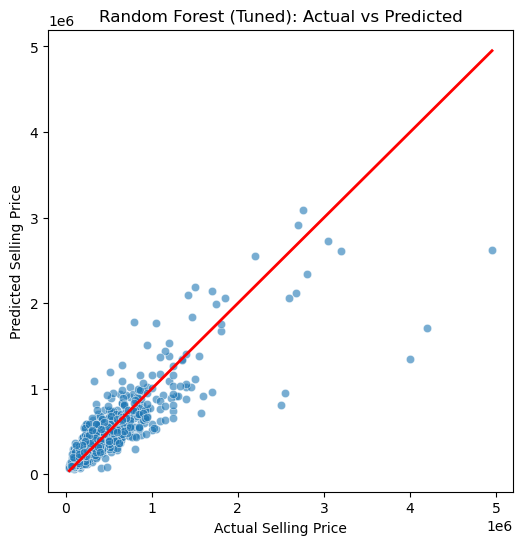

In [41]:
# Tune all models
# Tune Random Forest
from sklearn.model_selection import RandomizedSearchCV

tuned_rf = RandomForestRegressor(random_state=42)

tuned_rf_param_distributions = {
    'n_estimators': [100, 200, 300, 400, 1000], # Number of decision trees in the forest
    'max_depth': [10, 20, 30, None], # Maximum depth of each tree can grow (how many splits)
    'min_samples_split': [2, 5, 10], # A node must have at least this many samples to be split into smaller nodes
    'min_samples_leaf': [1, 2, 5], # Minimum number of samples allowed in a leaf (end node)
    'max_features': ['sqrt', 'log2', None], # Number of features considered for splitting at each node
    'bootstrap': [True, False] # Whether each tree trains on the same and full dataset (no replacement) or random subset (with replacement)
}

tuned_rf_search = RandomizedSearchCV(
    estimator=tuned_rf,
    param_distributions=tuned_rf_param_distributions,
    n_iter=30,  
    cv=5, 
    scoring='r2', 
    n_jobs=-1,
    random_state=42,
    return_train_score=True
)

tuned_rf_search.fit(X_train, y_train)

print("Best Parameters:", tuned_rf_search.best_params_) # Shows the best combination that used in model and model can perform prediction better
print("Best CV R2  :", tuned_rf_search.best_score_) # Shows the score for that combination

best_tuned_rf = tuned_rf_search.best_estimator_ # That best model with its best parameters (based on score) is trained on all training data
y_pred_tuned_rf = best_tuned_rf.predict(X_test)

def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, mae, rmse

tuned_rf_results = evaluate_model(y_test, y_pred_tuned_rf)

print("\nRandom Forest (tuned) - R2: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}".format(*tuned_rf_results))

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_tuned_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', linewidth=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Random Forest (Tuned): Actual vs Predicted')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters: {'mlp__activation': 'relu', 'mlp__alpha': 0.004459327528535912, 'mlp__hidden_layer_sizes': (128, 64), 'mlp__learning_rate': 'constant', 'mlp__learning_rate_init': 0.001, 'mlp__max_iter': 5000, 'mlp__solver': 'adam'}
Best CV R2     : 0.6989777243767833

MLP Regression (tuned) - R2: 0.764, MAE: 141887.282, RMSE: 241369.542


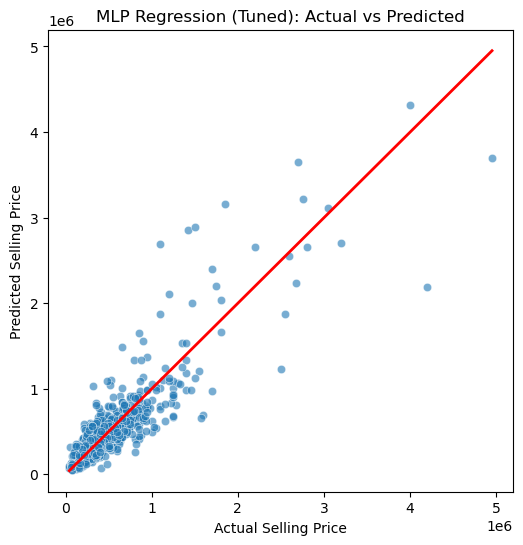

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform

# Build a pipeline for scaling and model
tuned_mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardize all numerical features before go modelling, so Mean = 0 and Standard deviation = 1 to treated fairly, so the scaler must be fit only on training folds. Perform during data preprocessing also can but may introduces data leakage
    ('mlp', MLPRegressor(random_state=42))
])

# Parameter space (prefix with 'mlp__')
tuned_mlp_param_distributions = {
    'mlp__hidden_layer_sizes': [(128,), (256,), (128, 64), (256, 128, 64)], # Number of neurons in each hidden layer, () as 1 hidden layer and value is neuron num
    'mlp__activation': ['relu', 'tanh'], # Activation function for neurons, how they transform input → output
    'mlp__solver': ['adam', 'lbfgs'], # Optimization algorithm used to minimize error during training
    'mlp__alpha':  uniform(1e-6, 1e-2), # L2 regularization parameter, drawn randomly from 0.00001 and 0.01
    'mlp__learning_rate': ['constant', 'adaptive'], # How the learning rate changes during training
    'mlp__learning_rate_init': [0.001, 0.005],
    'mlp__max_iter': [500, 1000, 3000, 5000]
}

# Randomized search
tuned_mlp_search = RandomizedSearchCV(
    estimator=tuned_mlp_pipeline,
    param_distributions=tuned_mlp_param_distributions,
    n_iter=30, # Picks 30 random alpha values out of 100, each alpha is tested 5 times on 5 different subsets of the training data, each subse
    cv=5, # 5-fold cross-validation. How many times the data is split and evaluated, cv=5 with n_iter=30 means model trains 30 × 5 = 150 times
    scoring='r2', # Evaluate performance
    n_jobs=-1, # CPU cores to use to speed up search
    random_state=42,
    return_train_score=True # Whether to store train scores
)

tuned_mlp_search.fit(X_train, y_train)

print("Best Parameters:", tuned_mlp_search.best_params_)
print("Best CV R2     :", tuned_mlp_search.best_score_)

#  Best parameter and predictions
best_tuned_mlp = tuned_mlp_search.best_estimator_
y_pred_tuned_mlp = best_tuned_mlp.predict(X_test)

def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, mae, rmse

tuned_mlp_results = evaluate_model(y_test, y_pred_tuned_mlp)

print("\nMLP Regression (tuned) - R2: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}".format(*tuned_mlp_results))

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_tuned_mlp, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', linewidth=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('MLP Regression (Tuned): Actual vs Predicted')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(



Ensemble Model (tuned) - R2: 0.778, MAE: 139159.487, RMSE: 234138.189


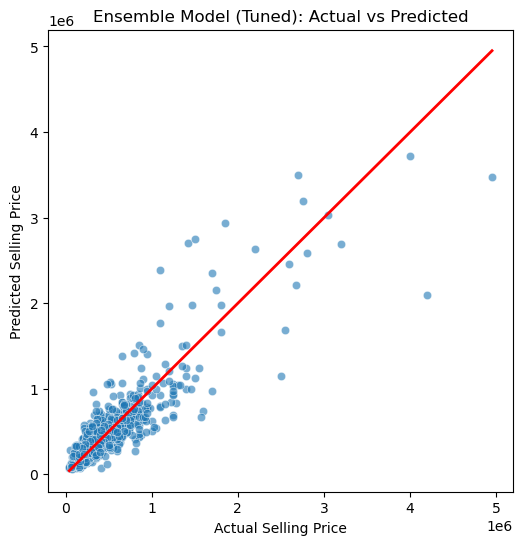

In [44]:
# Tune ensemble model by using averaging method
best_tuned_rf = tuned_rf_search.best_estimator_
best_tuned_mlp = tuned_mlp_search.best_estimator_

tuned_ensemble_model = VotingRegressor(
    estimators=[('rf', best_tuned_rf), ('mlp', best_tuned_mlp)],
    weights=[0.2, 0.8] # RF gets 30%, MLP gets 70%, due to MLP has better performance, before add weight, R2: 0.716
)

tuned_ensemble_model.fit(X_train, y_train)

y_pred_tuned_ensemble = tuned_ensemble_model.predict(X_test)

def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, mae, rmse

tuned_ensemble_results = evaluate_model(y_test, y_pred_tuned_ensemble)

print("\nEnsemble Model (tuned) - R2: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}".format(*tuned_ensemble_results))

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_tuned_ensemble, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', linewidth=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Ensemble Model (Tuned): Actual vs Predicted')
plt.show()

In [55]:
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, mae, rmse

rf_results = evaluate_model(y_test, y_pred_rf)
mlp_results = evaluate_model(y_test, y_pred_mlp)
ensemble_results = evaluate_model(y_test, y_pred_ensemble)

print("Random Forest  - R2: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}".format(*rf_results))
print("MLP Regression - R2: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}".format(*mlp_results))
print("Ensemble Model - R2: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}".format(*ensemble_results))

ridge_results = evaluate_model(y_test, y_pred_tuned_rf)
lasso_results = evaluate_model(y_test, y_pred_tuned_mlp)
rf_tuned_results = evaluate_model(y_test, y_pred_tuned_ensemble)

print("\nRandom Forest (tuned) - R2: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}".format(*tuned_rf_results))
print("MLP Regression (tuned)  - R2: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}".format(*tuned_mlp_results))
print("Ensemble Model (tuned)  - R2: {:.3f}, MAE: {:.3f}, RMSE: {:.3f}".format(*tuned_ensemble_results))

Random Forest  - R2: 0.611, MAE: 155350.025, RMSE: 309835.878
MLP Regression - R2: -0.456, MAE: 370992.681, RMSE: 598983.645
Ensemble Model - R2: 0.409, MAE: 214119.587, RMSE: 381605.757

Random Forest (tuned) - R2: 0.725, MAE: 141231.121, RMSE: 260487.472
MLP Regression (tuned)  - R2: 0.764, MAE: 141887.282, RMSE: 241369.542
Ensemble Model (tuned)  - R2: 0.778, MAE: 139159.487, RMSE: 234138.189
